In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [9]:
trial_idx=3
paper='2004.04168'

# Code-generation prompts

In [83]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [11]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
`
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy relev

# LLM-Generated code

In [12]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Alright,
Alright, let's analyze this Hamiltonian step by step.

The given Hamiltonian consists of three parts:
1. Kinetic term: $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$, where $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
2. Hartree term: $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
3. Fock term: $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

The interaction potential is: $U(k) = \sum_{n} U(n) e^{-i k \cdot n}$

Let's analyze each term and understand the structure:

1. Kinetic Term:
   - The kinetic term describes the energy of single-particle states.
   - $c^\dagger_s(k)$ creates a particle with spin $s$ at momentum $k$.
   - $c_s(k)$ annihilates a particle with spin $s$ at momentum $k$.
   - The energy $E_s(k)$ is gi

In [13]:
print(generated_code['thinking'])

Alright, let's analyze this Hamiltonian step by step.

The given Hamiltonian consists of three parts:
1. Kinetic term: $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$, where $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$
2. Hartree term: $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
3. Fock term: $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

The interaction potential is: $U(k) = \sum_{n} U(n) e^{-i k \cdot n}$

Let's analyze each term and understand the structure:

1. Kinetic Term:
   - The kinetic term describes the energy of single-particle states.
   - $c^\dagger_s(k)$ creates a particle with spin $s$ at momentum $k$.
   - $c_s(k)$ annihilates a particle with spin $s$ at momentum $k$.
   - The energy $E_s(k)$ is given by the Fourier transform of hopping amplitudes $t_s(n)$ be

In [14]:
print(generated_code['text'])

# ANSWER:

1) Tuple of Flavors (D) = (2,)
Basis Order:
0: spin. Order: spin_up, spin_down

2) EXP-VAL DEPENDENT TERMS: {
   "\langle c_s^\dagger(k_1) c_s(k_1) \rangle": "mean of exp_val[s, s, :]",
   "\langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle": "exp_val[s, s', k1]"
}

TERMS:
- \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k) -> H[s, s, k], NI
- \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2) -> H[s', s', k2], I
- -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2) -> H[s', s, k2], I

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a system with hopping and interaction terms.
    
    Args:
        N_shell (int): Number of shells for the k-space grid.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (floa

In [15]:
code = utils_auto.extract_code(generated_code['text'])

In [16]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a system with hopping and interaction terms.
    
    Args:
        N_shell (int): Number of shells for the k-space grid.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float, optional): Filling factor. Defaults to 0.5.
    """
    def __init__(self, N_shell: int=10, parameters: dict={'t_0': 1.0, 't_1': 0.1, 'U_0': 1.0, 'U_1': 0.5}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2,)  # LM Task: defines tuple - spin up and spin down
        self.basis_order = {'0': 'spin'}
        # Basis order: 0: spin up, 1: spin down

        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = 0.0  # Temperature set to 0
        self.a = parameters.get('a', 1.0)  # Lattice constant
        self.primitive_vectors = self.a * np.array([[0,1],[np.sqrt(3)/2,-1/2]])  # D

In [17]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_3.py


# Code evaluation

In [18]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [19]:
import importlib

In [20]:
module = importlib.import_module(code_path)

In [21]:
import HF

## Check k-space

In [56]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

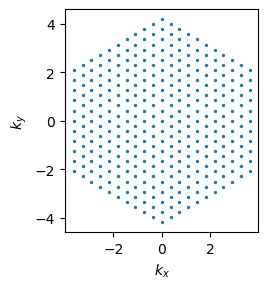

In [57]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Check energy dispersion for non-interacting term

In [59]:
t0 = "t0" if hasattr(ham,'t0') else 't_0'
t1 = "t1" if hasattr(ham,'t1') else 't_1'
U0 = "U0" if hasattr(ham,'U0') else 'U_0'
U1 = "U1" if hasattr(ham,'U1') else 'U_1'

In [ ]:
ham = module.HartreeFockHamiltonian(N_shell=10,)
setattr(ham,t1,1.0)
setattr(ham,t0,0)

In [61]:
h_nonint = ham.generate_non_interacting()

In [62]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

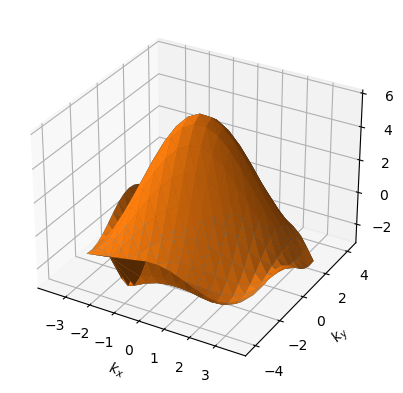

In [63]:
utils_auto.plot_2d_bandstructure(ham,en)

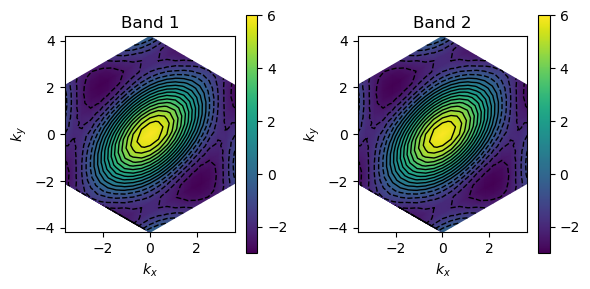

In [64]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Infinitesemial U limit

In [ ]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e-5)
setattr(ham_int,U1,0)

In [66]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [67]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

Convergence reached at iteration 1


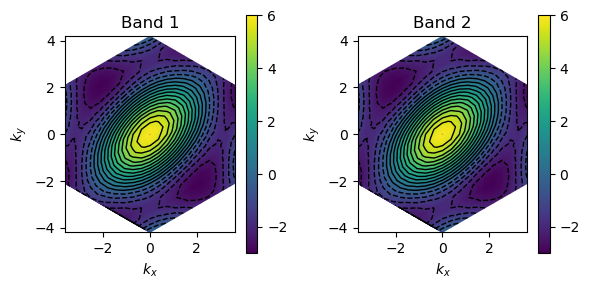

In [68]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Large U limit

In [ ]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e5)
setattr(ham_int,U1,0)

In [70]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [71]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 0


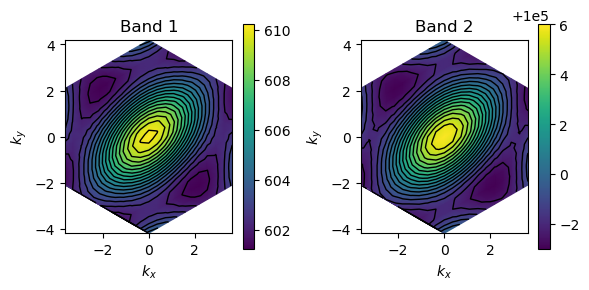

In [72]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [73]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is 99386.78
U/T is 25418.88
mean_U is 25151.06


# Auto eval

## Task 1

In [74]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper='2004.04168')
    )


#################### THINKING ####################

Let me
Let me analyze the image based on the provided rubric and problem statement:

The image shows a collection of blue dots arranged in a hexagonal pattern in momentum (k) space. The axes are labeled as k_x and k_y, with values ranging approximately from -4 to 4 on both axes.

Now, let's check against the rubric:

1. "This image should show momentum space mesh in the first Brillouin zone of the concerned problem."
   - The image appears to show a momentum space mesh
   - For a triangular lattice, the first Brillouin zone (BZ) should be a hexagon in k-space
   - The image indeed shows points arranged in a hexagonal pattern, which is consistent with the first BZ of a triangular lattice

2. "You need to check the point group symmetry."
   - A triangular lattice has a sixfold rotational symmetry (C6v point group)
   - Looking at the image, the arrangement of points exhibits this sixfold rotational symmetry around the origin
   - The h

In [75]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [76]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper='2004.04168')
    )


#################### THINKING ####################

Let me
Let me analyze the image provided according to the rubric:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that the Brillouin zone boundary forms a hexagon. This is indeed the expected shape for a triangular lattice in reciprocal space. The first Brillouin zone of a triangular lattice is a regular hexagon. So this matches what's expected.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
The highest energy regions (yellow) are located near the center of the Brillouin zone (around k_x = 0, k_y = 0) for both Band 1 and Band 2.

2.2 Trace the pattern of energy variation across the zone:
The energy appears to decrease radially outward from the center in both bands, with the contour lines forming concentric elliptical patterns rather 

In [77]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [78]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper='2004.04168')
    )


#################### THINKING ####################

Let me
Let me analyze the image showing the band structure plots for Band 1 and Band 2, and evaluate them according to the rubric.

1. First, identify the shape of the Brillouin zone boundary:
   The image shows a hexagonal boundary for both band plots, which is indeed the correct Brillouin zone shape for a triangular lattice. The first Brillouin zone of a triangular lattice is hexagonal, and that's what we see in these plots. So this point is correct.

2. Examining the symmetry of the energy distribution:

   2.1 Highest energy regions (yellow): 
   The highest energy regions (yellow) are at the center of both Band 1 and Band 2 plots. These appear to be centered at the Γ point (k_x = 0, k_y = 0).

   2.2 Pattern of energy variation:
   The energy decreases radially outward from the center in a continuous manner with contour lines forming nearly concentric ellipses, rather than perfect circles. The elliptical shape is slightly elonga

In [79]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [80]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper='2004.04168',U_int=1e5)
    )


#################### THINKING ####################

I
I've been given an image that shows two false color plots representing band structures in the first Brillouin zone after a self-consistent Hartree-Fock calculation. I need to analyze these plots and determine if they meet the criteria specified in the rubric.

Let's go through the rubric point by point:

1. **Shape of the Brillouin zone boundary**: The image shows hexagonal boundaries for both Band 1 and Band 2, which matches what's expected for a triangular lattice. The first Brillouin zone of a triangular lattice is indeed a hexagon, so this point is correct.

2. **Symmetry of the energy distribution**:

   2.1 **Highest energy regions**: The highest energy regions (yellow) in both bands are located at the center of the Brillouin zone (k_x = 0, k_y = 0).
   
   2.2 **Pattern of energy variation**: The energy decreases radially outward from the center in concentric contours, reaching the lowest values (dark purple) at the corners 

In [81]:
answer4=utils_auto.extract_result_content(result4['text'])

In [82]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '3' saved to final_answer.yaml
